In [1]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [19]:
path = ''

filename = 'data/output_populations_3-500-h-l.csv'
filename2 = 'data/output_pops_E.csv'
excel_filename = 'Data_Recording_Temp.xlsx'
st = 0
ed = 500

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']
dfS_3 = df['3']
# dfS_4 = df['4']
# dfS_5 = df['5']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3})

# df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3, 'species_4': dfS_4, 'species_5': dfS_5})
#col_names = df.columns

print(df.head(10))

iteration  species_1  species_2  species_3
0          1      38443      18347       9224
1          2      35178      26561      13988
2          3      32343      26042      17568
3          4      29769      24012      21407
4          5      27134      21802      25681
5          6      24687      19440      30247
6          7      22493      16388      34873
7          8      20590      12943      39368
8          9      18836       9599      43659
9         10      17535       6860      47169


In [3]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 or df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -3.858200
p-Value                   0.002365
#Lags used               15.000000
Observ used             884.000000
Critical Value (1%)      -3.437769
Critical Value (5%)      -2.864815
Critical Value (10%)     -2.568514
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test


In [4]:
def write_to_excel(value, name):
    df_excel = pd.DataFrame(value)
    #print("To insert:\n", df_excel)
    #df_excel = df_excel.append(ds_excel, ignore_index=True)
    df_excel.to_excel(path+excel_filename, sheet_name=name, index=False)

In [32]:
def format_result(data):
    output_1 = []
    output_2 = []
    output_3 = []
    output_4 = []
    output_5 = []
    output_6 = []
    output_7 = []
    output_8 = []

    output_1.append(data[1][0]['ssr_ftest'][0])
    output_2.append(data[1][0]['ssr_ftest'][1])
    output_3.append(data[1][0]['ssr_chi2test'][0])
    output_4.append(data[1][0]['ssr_chi2test'][1])
    output_5.append(data[1][0]['lrtest'][0])
    output_6.append(data[1][0]['lrtest'][1])
    output_7.append(data[1][0]['params_ftest'][0])
    output_8.append(data[1][0]['params_ftest'][1])


    df_output = pd.DataFrame(
        {"SF_F": output_1,
         "SF_p": output_2,
         "SC_chi2": output_3,
         "SC_p": output_4,
         "LR_chi2": output_5,
         "LR_p": output_6,
         "PF_F": output_7,
         "PF_p": output_8,}
    )

    #print(df_output)

    return df_output



1 eats 2?

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.3546  , p=0.0006915039633729698, df_denom=484, df_num=5
ssr based chi2 test:   chi2=22.2680 , p=0.00046559485615553004, df=5
likelihood ratio test: chi2=21.7817 , p=0.000576065800502464, df=5
parameter F test:         F=4.3546  , p=0.0006915039633817305, df_denom=484, df_num=5


2 eats 1?

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=22.0673 , p=6.122786747836627e-20, df_denom=484, df_num=5
ssr based chi2 test:   chi2=112.8439, p=1.0263130882085907e-22, df=5
likelihood ratio test: chi2=101.6534, p=2.3686374267344624e-20, df=5
parameter F test:         F=22.0673 , p=6.122786749894415e-20, df_denom=484, df_num=5


1 eats 3?

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=25.6349 , p=5.697376467053575e-23, df_denom=484, df_num=5
ssr based chi2 test:   chi2=131.0876, p=1.3987706517490012e-26, df=5
likelihood ratio test: chi2=116.2916, p=1.91377655780

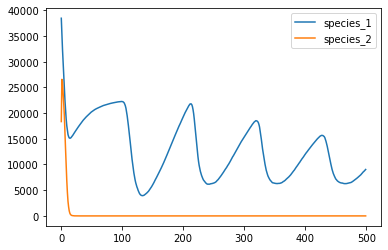

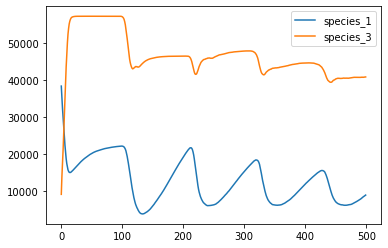

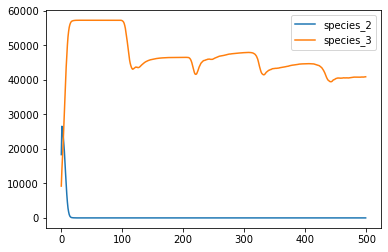

In [33]:
maxlag = [1]
def GCT(dataframe):
    print('\n\n1 eats 2?')
    result_1 = grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag, verbose=True)
    df_result_1 = format_result(result_1)
    print('\n\n2 eats 1?')
    result_2 = grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag, verbose=True)
    df_result_2 = format_result(result_2)
    df_1_2 = pd.concat([df_result_1, df_result_2], axis=1)
    #print(df_1_2)
    dataframe[['species_1', 'species_2']].plot()

    print('\n\n1 eats 3?')
    result_3 = grangercausalitytests(dataframe[['species_1', 'species_3']], maxlag=maxlag, verbose=True)
    df_result_3 = format_result(result_3)
    print('\n\n3 eats 1?')
    result_4 = grangercausalitytests(dataframe[['species_3', 'species_1']], maxlag=maxlag, verbose=True)
    df_result_4 = format_result(result_4)
    df_3_4 = pd.concat([df_result_3, df_result_4], axis=1)
    #print(df_3_4)
    dataframe[['species_1', 'species_3']].plot()

    print('\n\n2 eats 3?')
    result_5 = grangercausalitytests(dataframe[['species_2', 'species_3']], maxlag=maxlag, verbose=True)
    df_result_5 = format_result(result_5)
    print('\n\n3 eats 2?')
    result_6 = grangercausalitytests(dataframe[['species_3', 'species_2']], maxlag=maxlag, verbose=True)
    df_result_6 = format_result(result_6)
    df_5_6 = pd.concat([df_result_5, df_result_6], axis=1)
    #print(df_5_6)
    dataframe[['species_2', 'species_3']].plot()

    df_full = pd.concat([df_1_2, df_3_4, df_5_6], axis=1)
    #print(df_full)
    write_to_excel(df_full, "temp")

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS) estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2  species_3
0   5.702520   5.782393  -6.274187
1   5.384529   5.462532  -5.090825
2   5.135106   5.203965  -4.331541
3   4.970148   5.026265  -3.952761
4   4.816121   4.865562  -3.687875
5   4.670541   4.708979  -3.628340
6   4.394784   4.457623  -2.954044
7   4.254172   4.321129  -2.816423
8   4.047479   4.106343  -2.595541
9   3.789608   3.861168  -2.001055


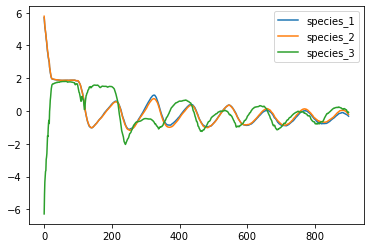

In [7]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2','species_3']].plot()

species_1  species_2  species_3
100   9.694986   9.680969  10.695552
101   9.654770   9.641408  10.755816
102   9.622053   9.608244  10.792654
103   9.599812   9.584796  10.810536
104   9.578588   9.563108  10.822854
105   9.558106   9.541513  10.825601
106   9.518119   9.505842  10.856207
107   9.497097   9.485925  10.862340
108   9.465370   9.453757  10.872105
109   9.424322   9.415727  10.897924


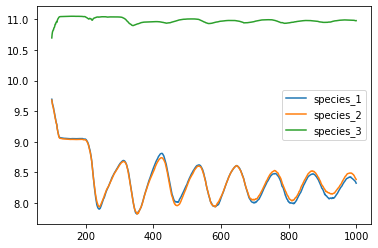

In [8]:
# Log-Transformation

logged_df = np.log(test)
print(logged_df.head(10))
logged_df[['species_1','species_2','species_3']].plot()

In [9]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(scaled_df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 or df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -3.858200
p-Value                   0.002365
#Lags used               15.000000
Observ used             884.000000
Critical Value (1%)      -3.437769
Critical Value (5%)      -2.864815
Critical Value (10%)     -2.568514
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5864  , p=0.01831322484083, df_denom=896, df_num=1
ssr based chi2 test:   chi2=5.6051  , p=0.017908396493214778, df=1
likelihood ratio test: chi2=5.5877  , p=0.018087165723339023, df=1
parameter F test:         F=5.5864  , p=0.018313224840830228, df_denom=896, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5606  , p=0.10990893001564835, df_denom=896, df_num=1
ssr based chi2 test:   chi2=2.5692  , p=0.1089640756698175, df=1
likelihood ratio test: chi2=2.5655  , p=0.10921680073836494, df=1
parameter F test:         F=2.5606  , p=0.10990893001570652, df_denom=896, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=405.0776, p=1.2709680287086557e-74, df_denom=896, df_num=1
ssr based chi2 test:   chi2=406.4339, p=2.189675356976751e-90, df=1
likelihood ratio test: chi2=335.3340, p=6.623284672056394e-75, df=1
para

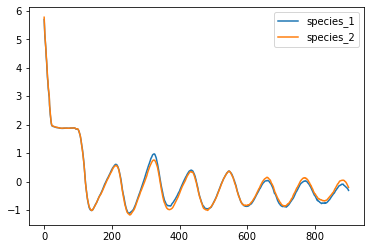

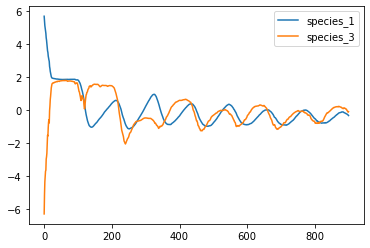

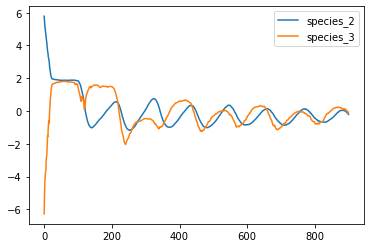

In [10]:
GCT(scaled_df)



1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1334  , p=0.7150186272798809, df_denom=896, df_num=1
ssr based chi2 test:   chi2=0.1338  , p=0.7144764736400805, df=1
likelihood ratio test: chi2=0.1338  , p=0.7144866345754175, df=1
parameter F test:         F=0.1334  , p=0.7150186272765268, df_denom=896, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1054  , p=0.7455677263003431, df_denom=896, df_num=1
ssr based chi2 test:   chi2=0.1057  , p=0.7450810224523543, df=1
likelihood ratio test: chi2=0.1057  , p=0.7450882554521965, df=1
parameter F test:         F=0.1054  , p=0.7455677262888611, df_denom=896, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=192.8856, p=7.331924948558212e-40, df_denom=896, df_num=1
ssr based chi2 test:   chi2=193.5315, p=5.389199317655326e-44, df=1
likelihood ratio test: chi2=175.2778, p=5.206575029319871e-40, df=1
parameter F 

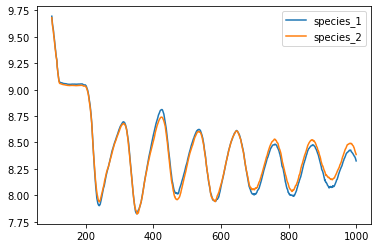

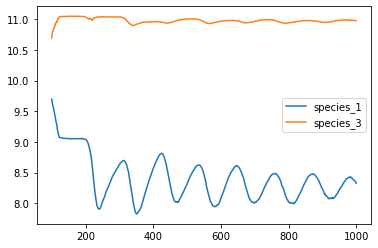

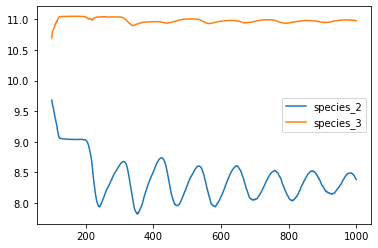

In [11]:
GCT(logged_df)

species_1  species_2  species_3
0     5.702520   5.782393  -6.274187
20    2.123139   2.140821   1.151269
40    1.896074   1.898221   1.756108
60    1.878187   1.882254   1.808309
80    1.882659   1.885344   1.766894
100   1.834960   1.843623   1.462749
120   0.256932   0.218050   0.161180
140  -1.021986  -1.018127   1.451963
160  -0.592699  -0.599887   1.544285
180  -0.067021  -0.115203   1.505027


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7409  , p=0.3943937122317258, df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.7951  , p=0.372574221374396, df=1
likelihood ratio test: chi2=0.7880  , p=0.3747167859975279, df=1
parameter F test:         F=0.7409  , p=0.3943937122317287, df_denom=41, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2672  , p=0.6079852462095177, df_denom=41, df_num=1
ssr based chi2 test:   chi2=0.2868  , p=0.5923012887781852, df=1
likelihood ratio test: chi2=0.2858  , p=0.

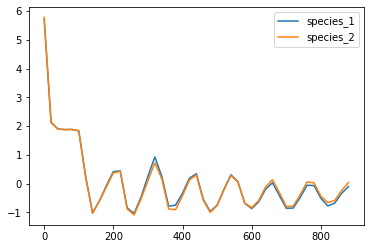

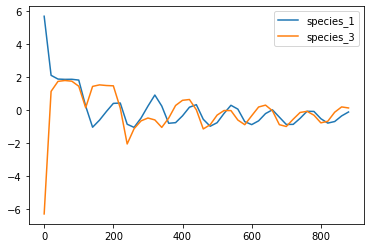

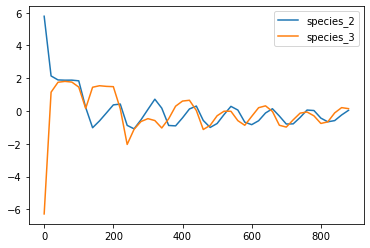

In [18]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%20==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

species_1  species_2  species_3
0     5.702520   5.782393  -6.274187
50    1.871728   1.878648   1.786739
100   1.834960   1.843623   1.462749
150  -0.846098  -0.858969   1.581387
200   0.422386   0.375148   1.487339
250  -1.110924  -1.144320  -1.573526
300   0.255441   0.100098  -0.463504
350  -0.383521  -0.522626  -0.886288
400  -0.331351  -0.414976   0.608985
450  -0.030750  -0.075542  -0.626147


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0074  , p=0.9327979085046186, df_denom=14, df_num=1
ssr based chi2 test:   chi2=0.0090  , p=0.9246270153218763, df=1
likelihood ratio test: chi2=0.0089  , p=0.9246369038891553, df=1
parameter F test:         F=0.0074  , p=0.9327979085045974, df_denom=14, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0882  , p=0.7708641212977345, df_denom=14, df_num=1
ssr based chi2 test:   chi2=0.1071  , p=0.7434984622217489, df=1
likelihood ratio test: chi2=0.1067  , p=0

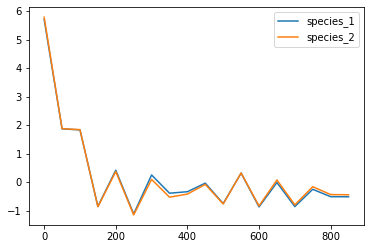

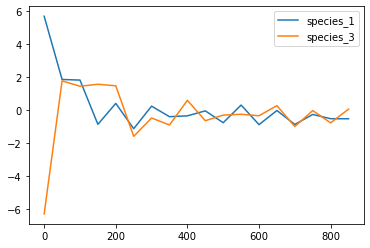

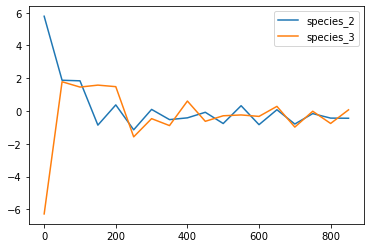

In [13]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)